In [3]:
words = open("names.txt").read().splitlines()
words[:10]
len(words)
min(len(w) for w in words)
max(len(w) for w in words)

b = {}
for w in words:
    # why use list instead of string?
    chs = ['<S>'] + list(w) + ['<E>']
    for ch1, ch2 in zip(w, w[1:]):
        bigram = (ch1, ch2)
        b[bigram] = b.get(bigram, 0) + 1

sorted(b.items(), key=lambda x: -x[1])


[(('a', 'n'), 5438),
 (('a', 'r'), 3264),
 (('e', 'l'), 3248),
 (('r', 'i'), 3033),
 (('n', 'a'), 2977),
 (('l', 'e'), 2921),
 (('e', 'n'), 2675),
 (('l', 'a'), 2623),
 (('m', 'a'), 2590),
 (('a', 'l'), 2528),
 (('l', 'i'), 2480),
 (('i', 'a'), 2445),
 (('o', 'n'), 2411),
 (('r', 'a'), 2356),
 (('a', 'h'), 2332),
 (('h', 'a'), 2244),
 (('y', 'a'), 2143),
 (('i', 'n'), 2126),
 (('a', 'y'), 2050),
 (('e', 'r'), 1958),
 (('n', 'n'), 1906),
 (('y', 'n'), 1826),
 (('k', 'a'), 1731),
 (('n', 'i'), 1725),
 (('r', 'e'), 1697),
 (('i', 'e'), 1653),
 (('a', 'i'), 1650),
 (('a', 'm'), 1634),
 (('l', 'y'), 1588),
 (('j', 'a'), 1473),
 (('n', 'e'), 1359),
 (('l', 'l'), 1345),
 (('i', 'l'), 1345),
 (('i', 's'), 1316),
 (('d', 'a'), 1303),
 (('s', 'h'), 1285),
 (('d', 'e'), 1283),
 (('e', 'e'), 1271),
 (('m', 'i'), 1256),
 (('s', 'a'), 1201),
 (('a', 's'), 1118),
 (('y', 'l'), 1104),
 (('e', 'y'), 1070),
 (('o', 'r'), 1059),
 (('a', 'd'), 1042),
 (('t', 'a'), 1027),
 (('v', 'i'), 911),
 (('k', 'e'), 

In [4]:
import torch
N = torch.zeros((27, 27), dtype=torch.int32)
chars = sorted(list(set(''.join(words))))
stoi = {c: i+1 for i, c in enumerate(chars)}
stoi['.'] = 0
itos = {i: c for c, i in stoi.items()}
len(itos)

27

In [5]:
#for biagram, c in b.items():
#    ch1 = stoi[biagram[0]]
#    ch2 = stoi[biagram[1]]
#    N[ch1][ch2] = c

for w in words:
    # why use list instead of string?
    chs = ['.'] + list(w) + ['.']
    for ch1, ch2 in zip(chs, chs[1:]):
        idx1 = stoi[ch1]
        idx2 = stoi[ch2]
        N[idx1][idx2] += 1

sorted(b.items(), key=lambda x: -x[1])


[(('a', 'n'), 5438),
 (('a', 'r'), 3264),
 (('e', 'l'), 3248),
 (('r', 'i'), 3033),
 (('n', 'a'), 2977),
 (('l', 'e'), 2921),
 (('e', 'n'), 2675),
 (('l', 'a'), 2623),
 (('m', 'a'), 2590),
 (('a', 'l'), 2528),
 (('l', 'i'), 2480),
 (('i', 'a'), 2445),
 (('o', 'n'), 2411),
 (('r', 'a'), 2356),
 (('a', 'h'), 2332),
 (('h', 'a'), 2244),
 (('y', 'a'), 2143),
 (('i', 'n'), 2126),
 (('a', 'y'), 2050),
 (('e', 'r'), 1958),
 (('n', 'n'), 1906),
 (('y', 'n'), 1826),
 (('k', 'a'), 1731),
 (('n', 'i'), 1725),
 (('r', 'e'), 1697),
 (('i', 'e'), 1653),
 (('a', 'i'), 1650),
 (('a', 'm'), 1634),
 (('l', 'y'), 1588),
 (('j', 'a'), 1473),
 (('n', 'e'), 1359),
 (('l', 'l'), 1345),
 (('i', 'l'), 1345),
 (('i', 's'), 1316),
 (('d', 'a'), 1303),
 (('s', 'h'), 1285),
 (('d', 'e'), 1283),
 (('e', 'e'), 1271),
 (('m', 'i'), 1256),
 (('s', 'a'), 1201),
 (('a', 's'), 1118),
 (('y', 'l'), 1104),
 (('e', 'y'), 1070),
 (('o', 'r'), 1059),
 (('a', 'd'), 1042),
 (('t', 'a'), 1027),
 (('v', 'i'), 911),
 (('k', 'e'), 

(-0.5, 26.5, 26.5, -0.5)

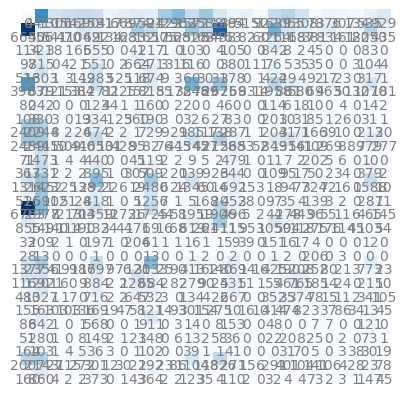

In [6]:
import matplotlib.pyplot as plt
%matplotlib  inline
plt.imshow(N, cmap='Blues')
for i in range(27):
    for j in range(27):
        chstr = itos[i] + itos[j]
        #plt.text(j, i, chstr, ha='center', va='bottom', color='gray')
        plt.text(j, i, N[i, j].item(), ha='center', va='top', color='gray')
plt.axis('off')

In [7]:
N[0]
p = N[0].float()
p = p/p.sum()
p

tensor([0.0000, 0.1377, 0.0408, 0.0481, 0.0528, 0.0478, 0.0130, 0.0209, 0.0273,
        0.0184, 0.0756, 0.0925, 0.0491, 0.0792, 0.0358, 0.0123, 0.0161, 0.0029,
        0.0512, 0.0642, 0.0408, 0.0024, 0.0117, 0.0096, 0.0042, 0.0167, 0.0290])

In [8]:
g = torch.Generator().manual_seed(2147483647)
ix = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item()
itos[ix]

'c'

In [9]:
torch.multinomial(p, num_samples=100, replacement=True, generator=g)


tensor([ 9, 18,  2,  5,  3,  1, 13, 11, 11, 22, 11, 15, 26,  2, 18, 13, 10,  1,
        15,  2,  3, 15, 10, 12,  4,  9,  3,  4,  6,  4, 19, 10,  3,  8,  4, 10,
        13, 14, 13, 10, 19, 11,  8, 13,  5,  5,  6, 25, 20, 10, 18,  1,  8,  3,
         2, 20,  1,  1,  3, 10, 11, 25, 18,  1,  9, 11,  8, 12,  3, 12, 19,  9,
        18, 13,  4,  4, 13, 13,  8, 13,  1,  2,  4,  1,  6,  1,  1, 10, 14, 10,
        13, 12, 10,  1,  1, 20, 18, 20, 19,  1])

In [10]:
P = (N+1).float()
P = P/P.sum(1, keepdim=True)

g = torch.Generator().manual_seed(2147483647)

for i in range(5):
    out = []
    ix = 0
    while True:
        p = P[ix]
        ix = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item() 
        if itos[ix] == '.':
            break
        out.append(itos[ix])
    print(''.join(out))

cexze
momasurailezitynn
konimittain
llayn
ka


In [11]:
log_likelihood = 0.0
n = 0

for w in words:
    ws = ['.'] + list(w) + ['.']
    for ch1, ch2 in zip(ws, ws[1:]):
        prob = P[stoi[ch1]][stoi[ch2]]
        logprob = torch.log(prob)
        log_likelihood += logprob
        n += 1

print(f'{log_likelihood=}')
nll = -log_likelihood
print(f'{nll=}')
print(f'{nll/n}')

log_likelihood=tensor(-559951.5625)
nll=tensor(559951.5625)
2.4543561935424805


In [12]:
# create the training set of bigrams (x,y)
xs, ys = [], []
for w in words[:1]:
    chs = ['.'] + list(w) + ['.']
    for idx, idy in zip(chs, chs[1:]):
        print(idx, idy)
        xs.append(stoi[idx])
        ys.append(stoi[idy])

xs = torch.tensor(xs)
ys = torch.tensor(ys)

. e
e m
m m
m a
a .


In [13]:
print(xs)
print(ys)

tensor([ 0,  5, 13, 13,  1])
tensor([ 5, 13, 13,  1,  0])


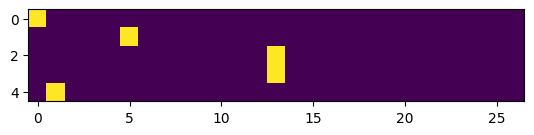

In [14]:
import torch.nn.functional as F
xenc = F.one_hot(xs, num_classes=27).float()
xenc
xenc.shape
plt.imshow(xenc)

In [15]:
W = torch.randn((27,27))
# why log-counts
logits = xenc@W # 为什么例子里已经是 (5, 27)
counts = logits.exp()
probs = counts / counts.sum(1, keepdim=True)
probs

tensor([[0.0117, 0.0148, 0.0783, 0.0309, 0.0084, 0.1647, 0.0228, 0.0145, 0.0567,
         0.0164, 0.0169, 0.0174, 0.0674, 0.0255, 0.0039, 0.0533, 0.0791, 0.0102,
         0.1096, 0.0245, 0.0425, 0.0055, 0.0505, 0.0186, 0.0213, 0.0183, 0.0162],
        [0.1024, 0.0302, 0.0164, 0.0062, 0.0143, 0.0417, 0.0908, 0.0311, 0.0107,
         0.0734, 0.0096, 0.1266, 0.0542, 0.0484, 0.0330, 0.0120, 0.0716, 0.0365,
         0.0219, 0.0214, 0.0119, 0.0177, 0.0124, 0.0313, 0.0028, 0.0450, 0.0265],
        [0.0175, 0.0146, 0.0362, 0.0472, 0.0023, 0.1229, 0.0923, 0.1391, 0.0038,
         0.0108, 0.0971, 0.0039, 0.0129, 0.0139, 0.0288, 0.0982, 0.0280, 0.0319,
         0.0075, 0.0298, 0.0128, 0.0289, 0.0243, 0.0157, 0.0494, 0.0106, 0.0197],
        [0.0175, 0.0146, 0.0362, 0.0472, 0.0023, 0.1229, 0.0923, 0.1391, 0.0038,
         0.0108, 0.0971, 0.0039, 0.0129, 0.0139, 0.0288, 0.0982, 0.0280, 0.0319,
         0.0075, 0.0298, 0.0128, 0.0289, 0.0243, 0.0157, 0.0494, 0.0106, 0.0197],
        [0.0166, 0.0112,

In [16]:
probs[0]
probs[0].sum()

tensor(1.0000)

In [17]:
# randomly initialize 27 neuron's weights. each neuron receives 27 inputs
g = torch.Generator().manual_seed(2147483647)
W = torch.randn((27,27), generator=g)


In [18]:
# 不需要权重？
xenc = F.one_hot(xs, num_classes=27).float() # input to the network: one-hot encoding
# 为什么还需要乘以 W？
logits = xenc@W # predict log-counts
# this is called a 'softmax'
counts = logits.exp()
probs = counts/counts.sum(1, keepdim=True)
probs.shape

torch.Size([5, 27])

In [19]:
nlls = torch.zeros(5)

for i in range(5):
    # i-th bigram
    x = xs[i].item()
    y = ys[i].item()
    print('--------')
    print(f"bigram example {i+1}: {itos[x]}{itos[y]} (indexes {x},{y})")
    print('input to the neural net:', x)
    #print('output probs from the neural net:', probs[i])
    print('label (actual next character):', y)
    p = probs[i][y]
    print('probs assigned by the net to the correct character:', p.item())
    logp = torch.log(p)
    print('log likelihood:', logp.item())
    nll = -logp
    print('negaive log likelihood:', nll.item())
    nlls[i] = nll

print('===========')
print('average negative log likelihood, i.e., loss =', nlls.mean().item())

--------
bigram example 1: .e (indexes 0,5)
input to the neural net: 0
label (actual next character): 5
probs assigned by the net to the correct character: 0.012286253273487091
log likelihood: -4.3992743492126465
negaive log likelihood: 4.3992743492126465
--------
bigram example 2: em (indexes 5,13)
input to the neural net: 5
label (actual next character): 13
probs assigned by the net to the correct character: 0.018050702288746834
log likelihood: -4.014570713043213
negaive log likelihood: 4.014570713043213
--------
bigram example 3: mm (indexes 13,13)
input to the neural net: 13
label (actual next character): 13
probs assigned by the net to the correct character: 0.026691533625125885
log likelihood: -3.623408794403076
negaive log likelihood: 3.623408794403076
--------
bigram example 4: ma (indexes 13,1)
input to the neural net: 13
label (actual next character): 1
probs assigned by the net to the correct character: 0.07367684692144394
log likelihood: -2.6080667972564697
negaive log like

In [20]:
xs

tensor([ 0,  5, 13, 13,  1])

In [21]:
ys

tensor([ 5, 13, 13,  1,  0])

In [22]:
g = torch.Generator().manual_seed(2147483647)
W = torch.randn((27, 27), generator=g, requires_grad=True)
# forward pass
xenc = F.one_hot(xs, num_classes=27).float() # input to the network: one-hot encoding
logits = xenc @ W # predict log-counts
counts = logits.exp() # counts, equivalent to N
probs = counts / counts.sum(dim=1, keepdim=True) # probabilities for next character
loss = -probs[torch.arange(5), ys].log().mean() # .log() 的结果是什么？
print(loss.item())

3.7693049907684326


In [23]:
# backward pass
W.grad = None # set to zero the gradient
loss.backward()

W.data += -0.1*W.grad

# -------- !!! optimization !!! yay, but this time actually -------


In [24]:
# create the dataset
xs, ys = [], []
for w in words:
    chs = ['.'] + list(w) + ['.'] 
    for ch1, ch2 in zip(chs, chs[1:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        xs.append(ix1) 
        ys.append(ix2) 

xs = torch.tensor(xs)
ys = torch.tensor(ys)
num = xs.nelement()
print('number of examples: ', num)

# initialize the 'network'
g = torch.Generator().manual_seed(2147483647)
W = torch.randn((27, 27), generator=g, requires_grad=True)

number of examples:  228146


In [ ]:
# gradient descent
import torch.nn.functional as F
for k in range(1):
    # forward pass
    xenc = F.one_hot(xs, num_classes=27).float() # input to the network
    logits = xenc @ W # predict log-counts
    print(f"{logits=}")
    counts = logits.exp() # convert logits to counts
    probs = counts/counts.sum(1, keepdim=True) # compute probabilities
    print(f"{probs=}")
    # 只计算第二个的 loss
    loss = -probs[:, ys].log().mean() # compute loss

    # backward pass
    W.grad = None
    loss.backward()

    # update weights
    W.data -= W.grad*0.1
    

: 